In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [3]:
#load dataset
df=pd.read_csv("/content/drive/MyDrive/AI in healthcare/EHR/visit_occurrence.csv")

# Drop columns with too many NaN values
df = df.drop(columns=['provider_id', 'care_site_id', 'visit_source_value', 'admitting_source_value',
                      'discharge_to_source_value', 'preceding_visit_occurrence_id', 'visit_start_datetime', 'visit_end_datetime'])

# Convert date columns
df['visit_start_date'] = pd.to_datetime(df['visit_start_date'])
df['visit_end_date'] = pd.to_datetime(df['visit_end_date'])

# Feature engineering: Extract year, month, and day from dates
df['visit_start_year'] = df['visit_start_date'].dt.year
df['visit_start_month'] = df['visit_start_date'].dt.month
df['visit_start_day'] = df['visit_start_date'].dt.day
df['visit_end_year'] = df['visit_end_date'].dt.year
df['visit_end_month'] = df['visit_end_date'].dt.month
df['visit_end_day'] = df['visit_end_date'].dt.day

# Feature engineering: Duration of visit
df['visit_duration'] = (df['visit_end_date'] - df['visit_start_date']).dt.days

# Drop original date columns
df = df.drop(columns=['visit_start_date', 'visit_end_date'],errors='ignore')

# Encode categorical variables
label_enc = LabelEncoder()
df['visit_type_concept_id'] = label_enc.fit_transform(df['visit_type_concept_id'])
df['visit_concept_id'] = label_enc.fit_transform(df['visit_concept_id'])  # Target Variable

# Encode categorical variables if needed
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes



In [4]:
y = df['visit_concept_id']
X = df.drop(columns=['visit_concept_id'])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()

# Fit models and make predictions
rf_model.fit(X_train, y_train)  # Train the RandomForest model
y_pred_rf = rf_model.predict(X_test)  # Get predictions

dt_model.fit(X_train, y_train)  # Train the DecisionTree model
y_pred_dt = dt_model.predict(X_test)  # Get predictions

nb_model.fit(X_train, y_train)  # Train the NaiveBayes model
y_pred_nb = nb_model.predict(X_test)  # Get predictions


In [5]:
# Model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Classification reports
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("\nNaïve Bayes Report:\n", classification_report(y_test, y_pred_nb))

Random Forest Accuracy: 0.5
Decision Tree Accuracy: 0.6
Naïve Bayes Accuracy: 0.6

Random Forest Report:
               precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.33      0.43      0.38         7

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.53      0.50      0.51        20


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.46      0.86      0.60         7

    accuracy                           0.60        20
   macro avg       0.66      0.66      0.60        20
weighted avg       0.72      0.60      0.60        20


Naïve Bayes Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.40      0.29      0.33         7

    accuracy                  

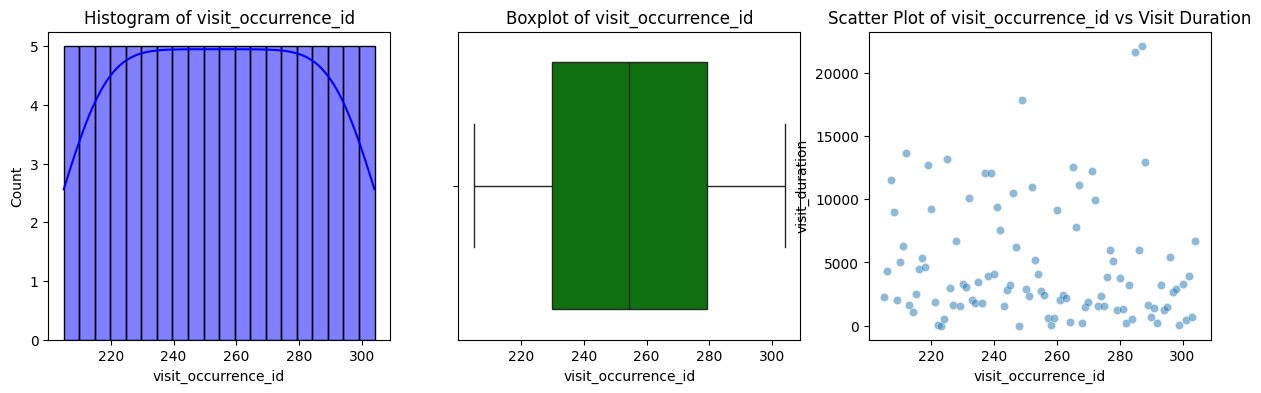

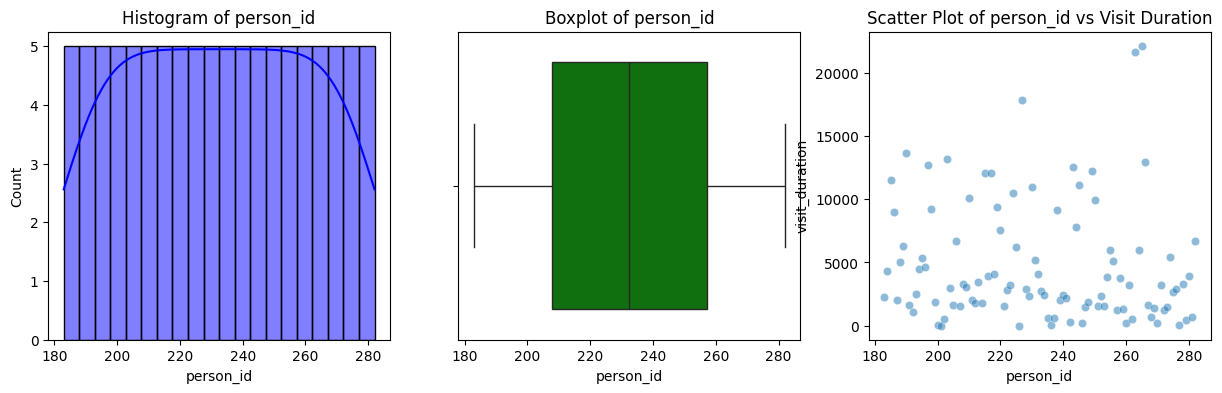

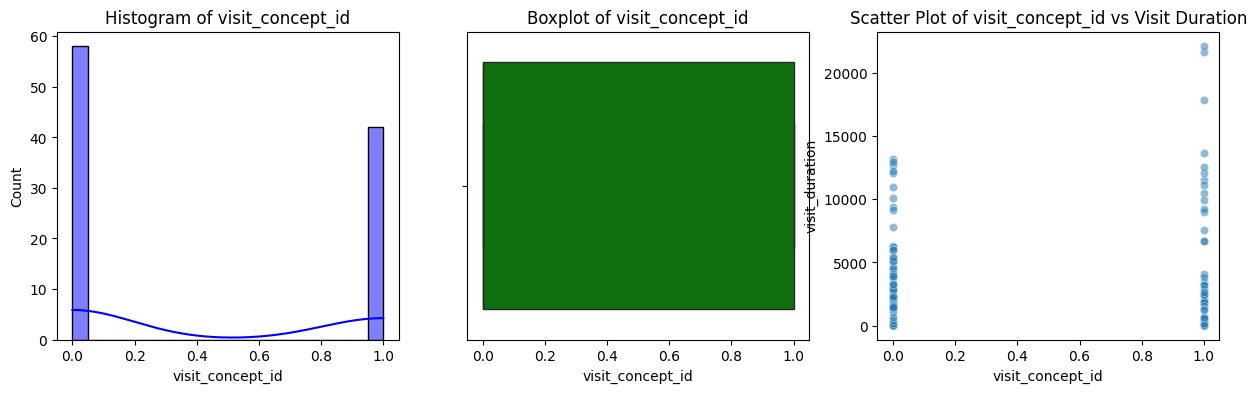

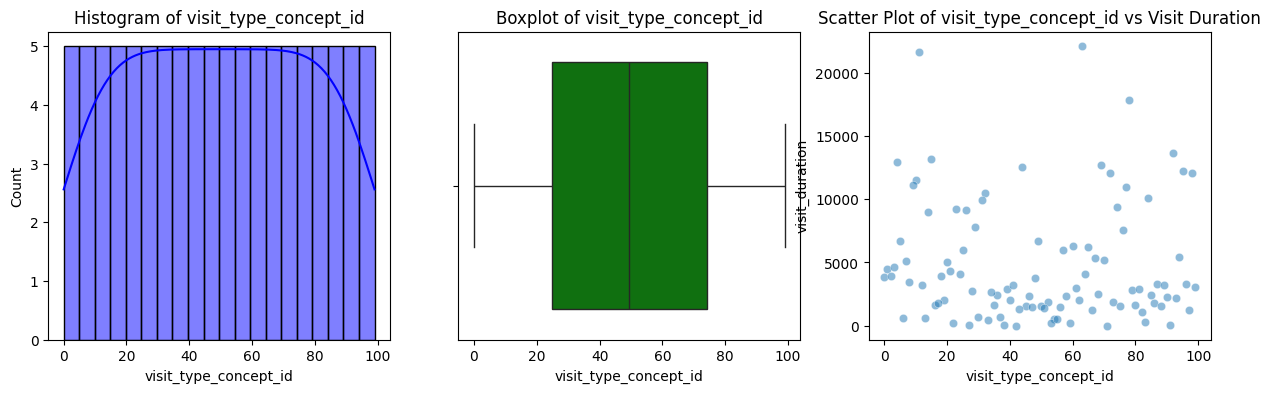

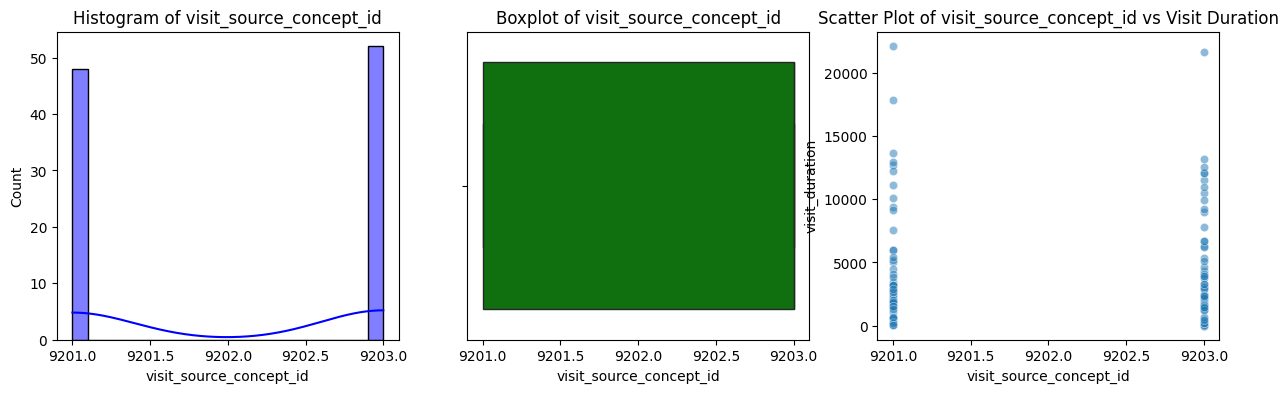

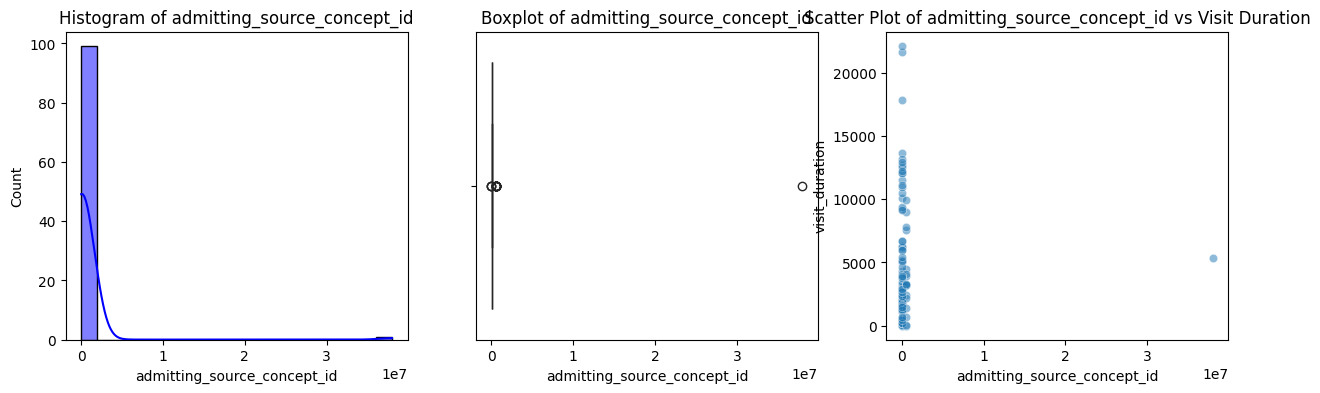

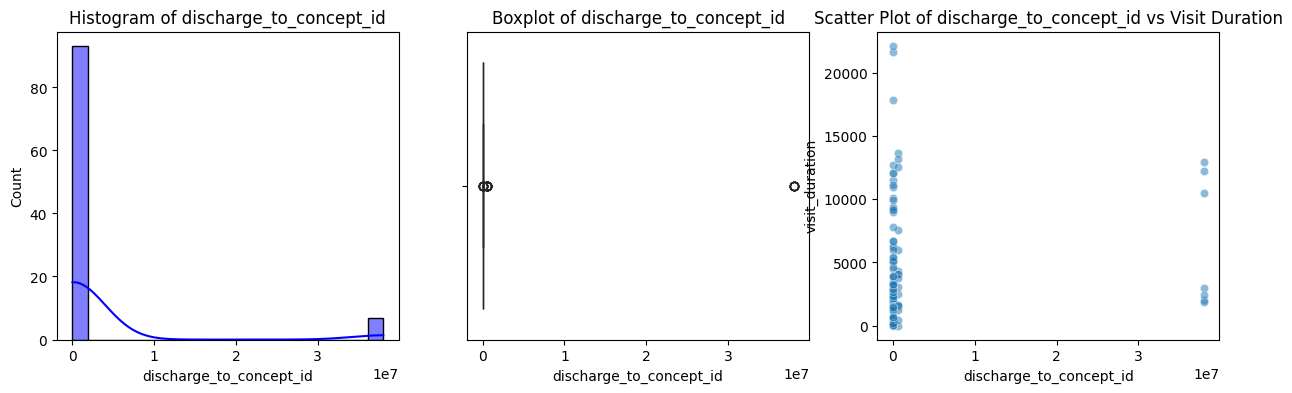

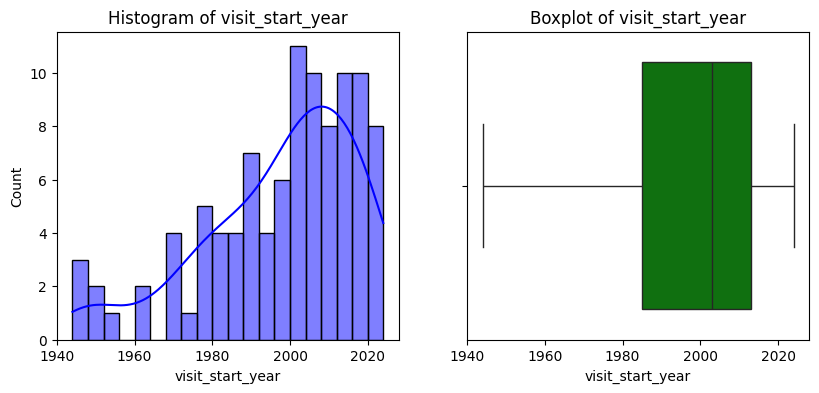

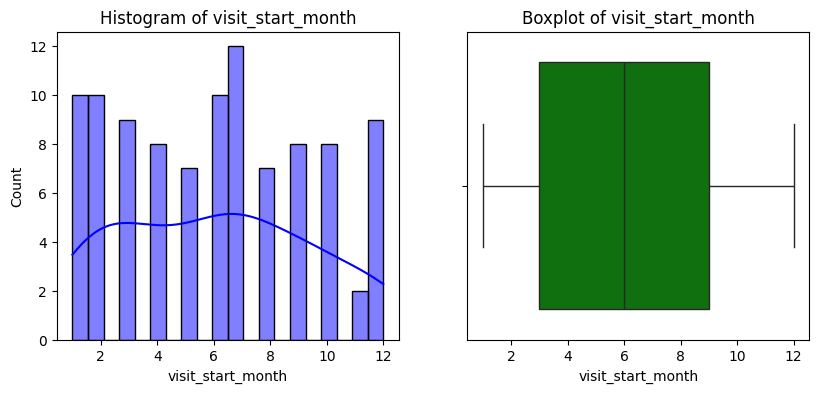

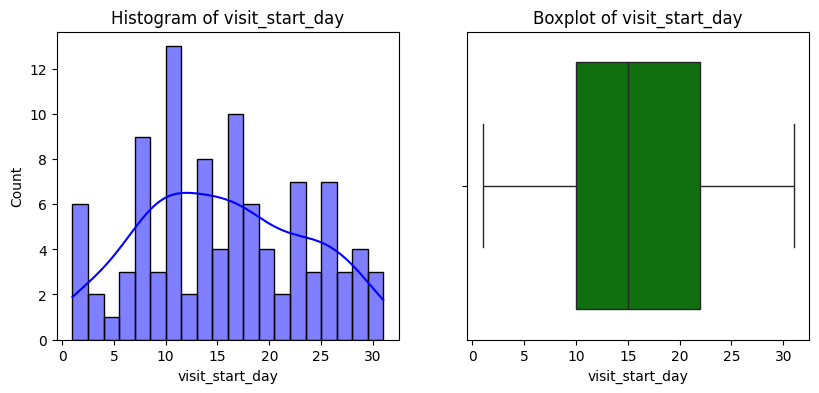

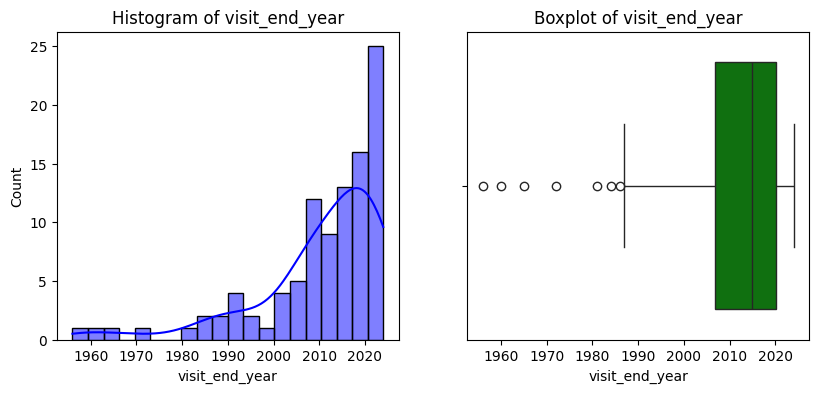

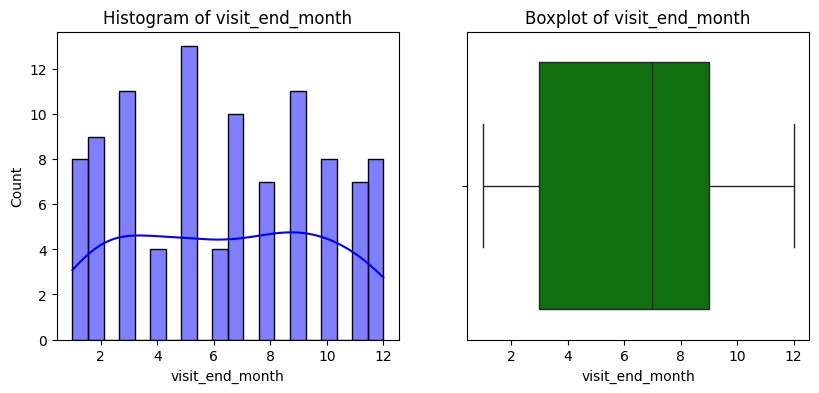

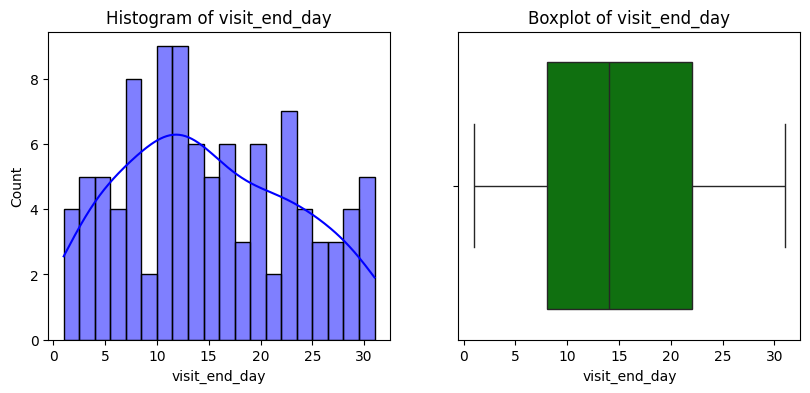

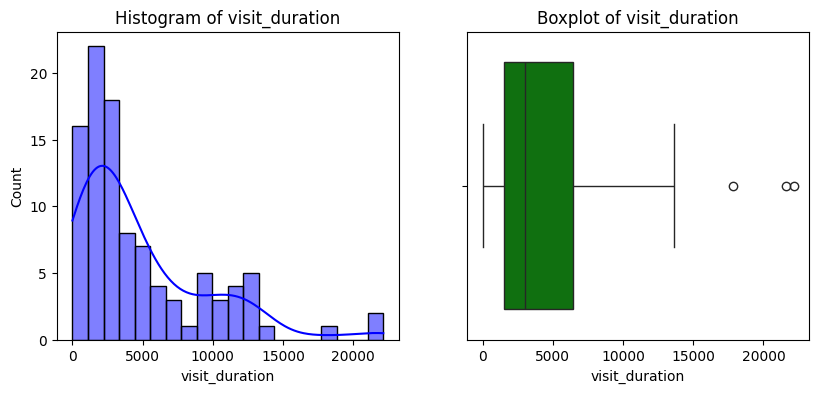

In [6]:
# Visualization: Histograms, Boxplots, and Scatter Plots
for col in df.columns:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot of {col}')

    # Scatter Plot (Only for numerical columns against visit_duration)
    if col != 'visit_duration' and df[col].dtype in [np.int64, np.float64]:
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[col], y=df['visit_duration'], alpha=0.5)
        plt.title(f'Scatter Plot of {col} vs Visit Duration')


<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


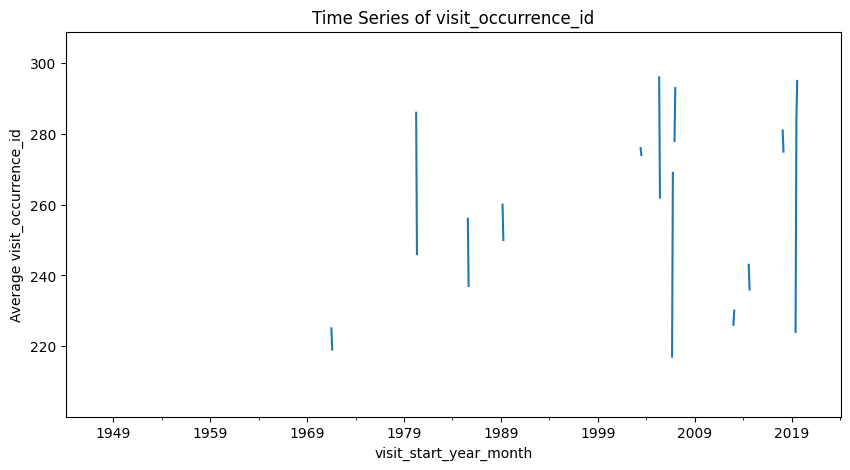

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


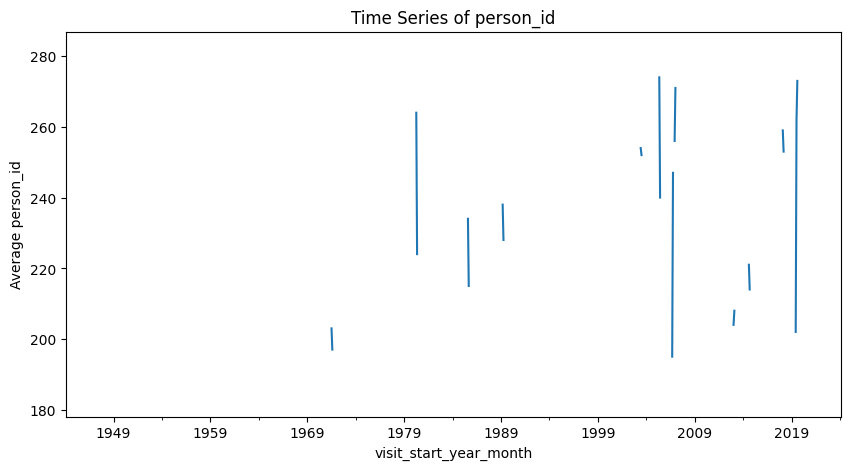

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


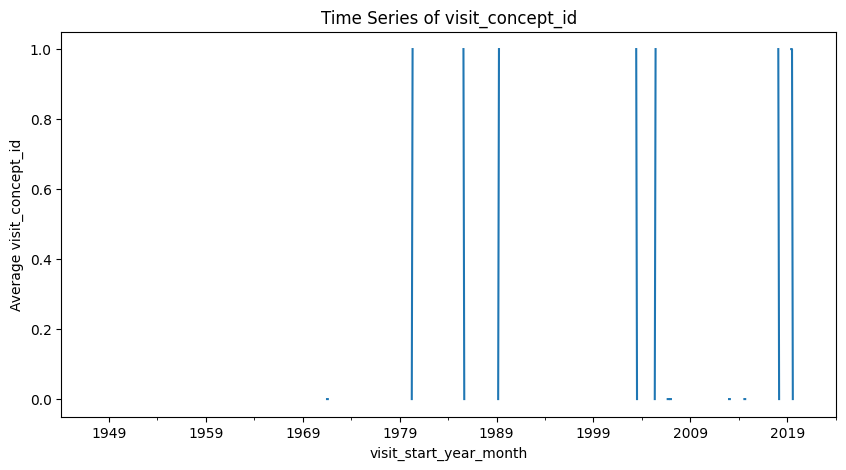

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


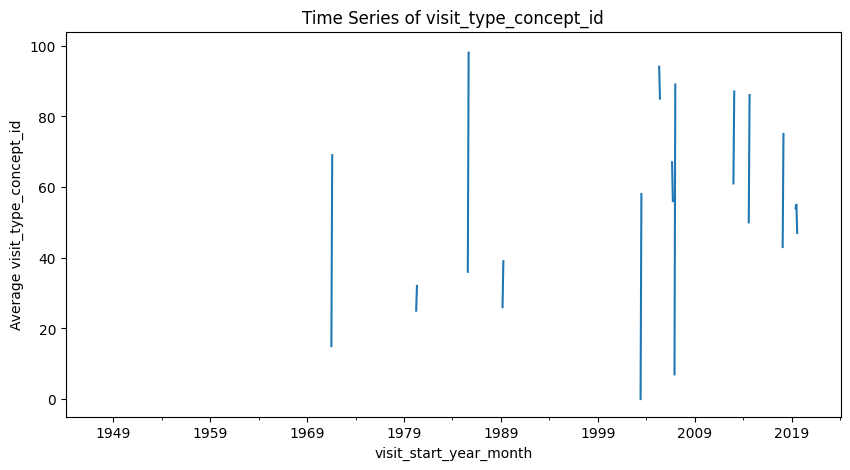

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


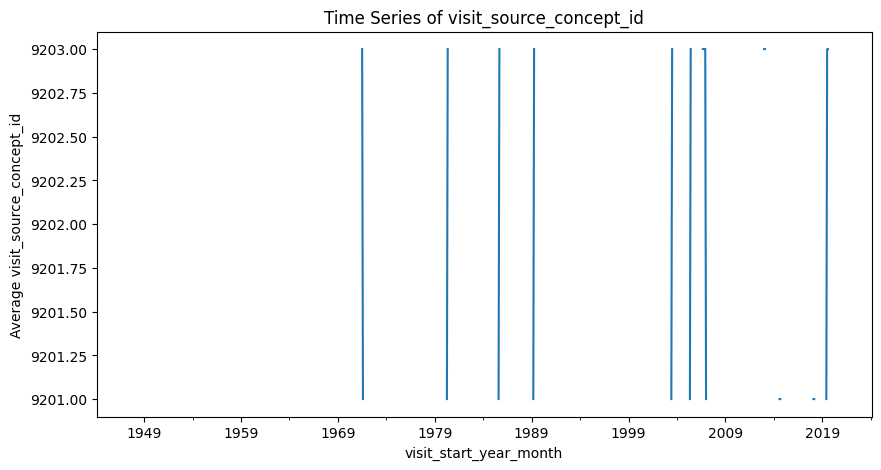

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


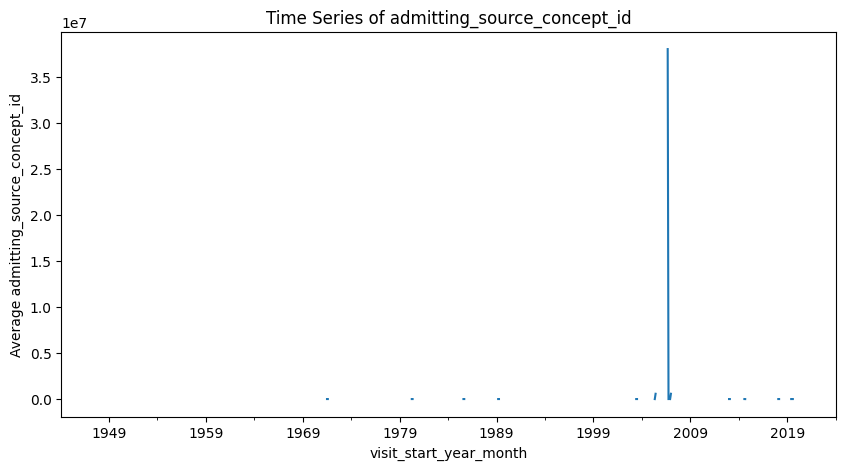

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


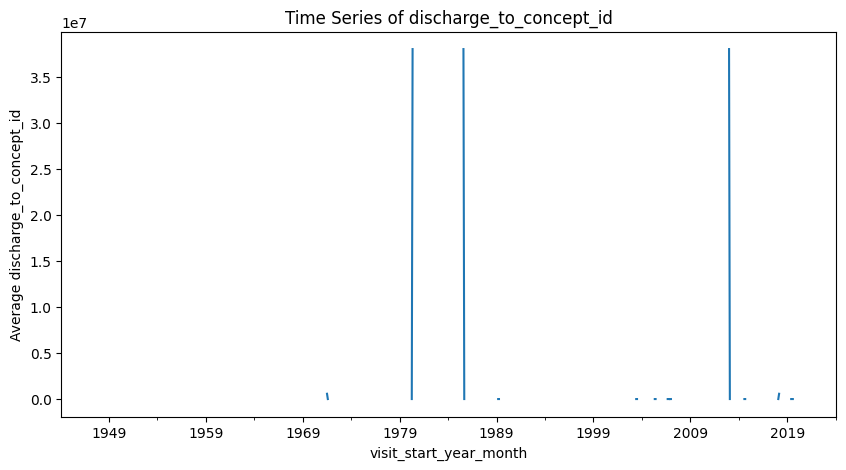

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


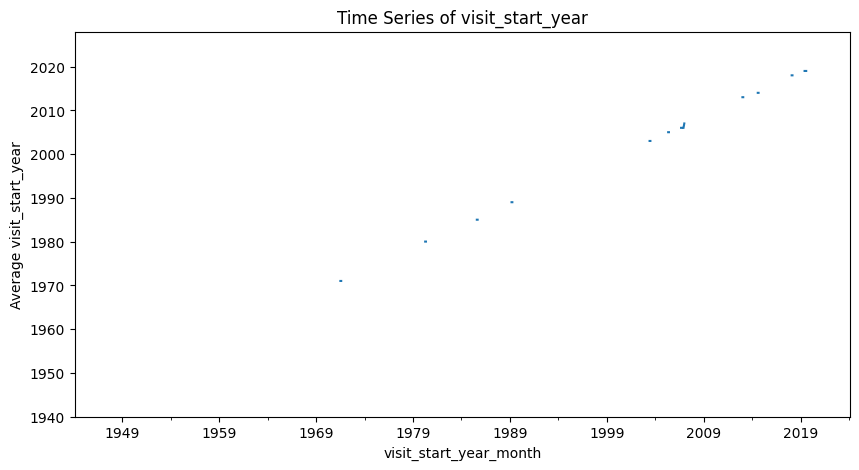

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


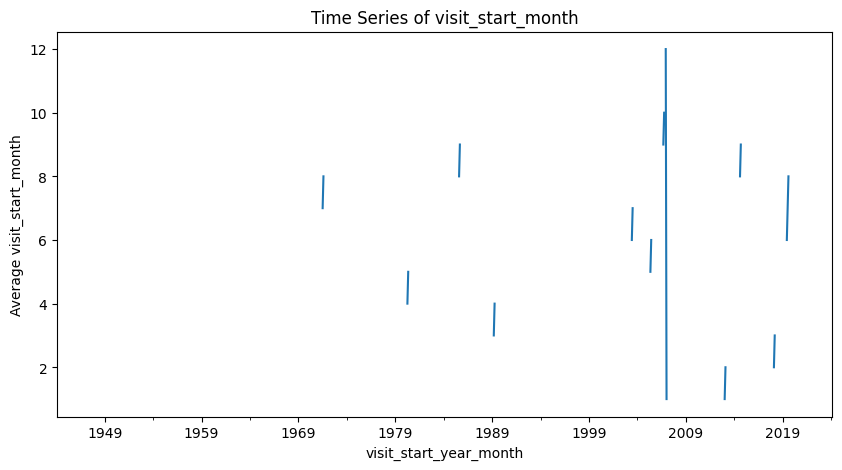

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


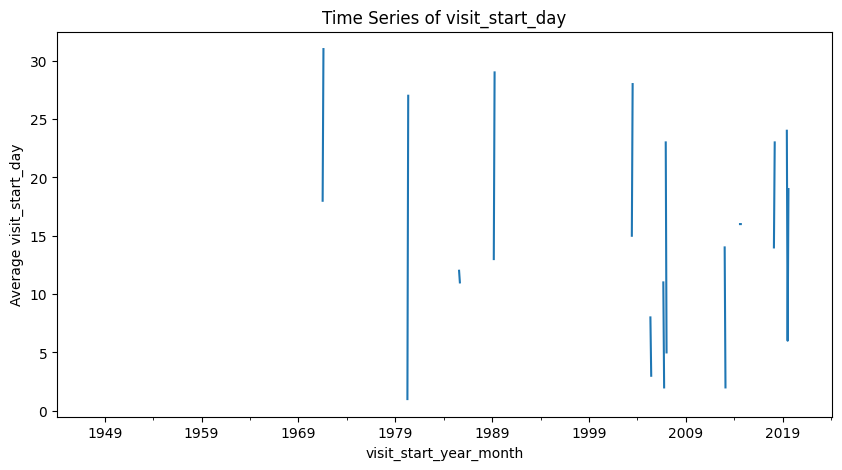

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


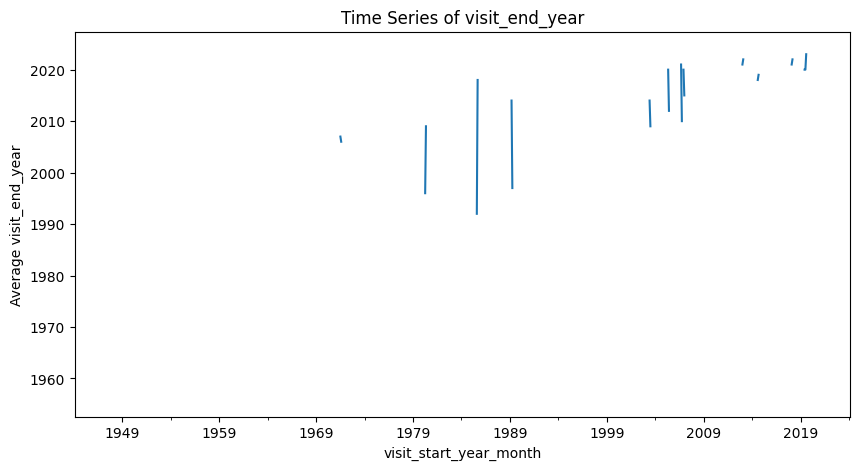

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


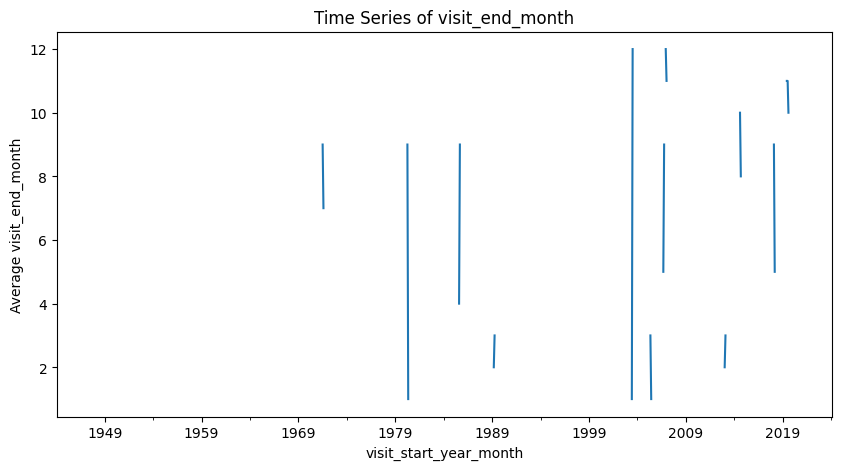

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


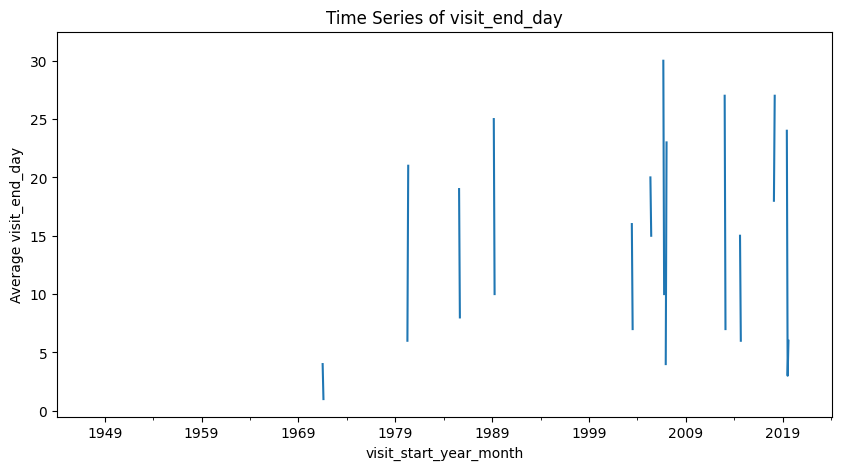

<ipython-input-7-d8bbdc456e19>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[col].resample('M').mean().plot()


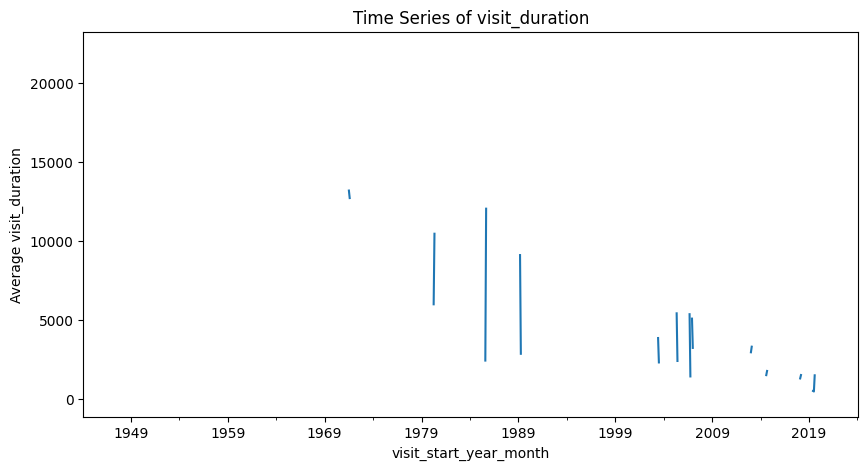

In [7]:
# Time series plots for each numerical column
df['visit_start_year_month'] = pd.to_datetime(df[['visit_start_year', 'visit_start_month', 'visit_start_day']].rename(columns={
    'visit_start_year': 'year',
    'visit_start_month': 'month',
    'visit_start_day': 'day'
}))

df.set_index('visit_start_year_month', inplace=True)

for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    df[col].resample('M').mean().plot()
    plt.ylabel(f'Average {col}')
    plt.title(f'Time Series of {col}')
    plt.show()

In [8]:
# Remove outliers using IQR
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



In [9]:
# Compute statistics
from scipy.stats import skew, kurtosis # Import skew and kurtosis

stats_df = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Standard Deviation': df.std(),
    'Skewness': df.apply(skew),
    'Kurtosis': df.apply(kurtosis)
})
print(stats_df)

                                      Mean  Median  Standard Deviation  \
visit_occurrence_id             251.969231   252.0           29.227004   
person_id                       229.969231   230.0           29.227004   
visit_concept_id                  0.369231     0.0            0.486352   
visit_type_concept_id            48.600000    49.0           27.573085   
visit_source_concept_id        9202.046154  9203.0            1.006708   
admitting_source_concept_id    8839.061538  8883.0          142.802735   
discharge_to_concept_id      123250.153846  8949.0       230853.940755   
visit_start_year               2001.969231  2004.0           16.191210   
visit_start_month                 6.153846     6.0            3.298820   
visit_start_day                  15.969231    16.0            8.100867   
visit_end_year                 2013.215385  2016.0            9.750789   
visit_end_month                   6.692308     7.0            3.409193   
visit_end_day                    13.80

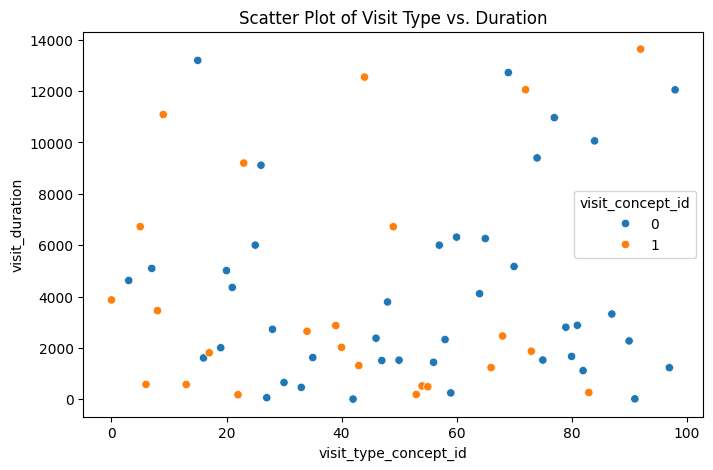

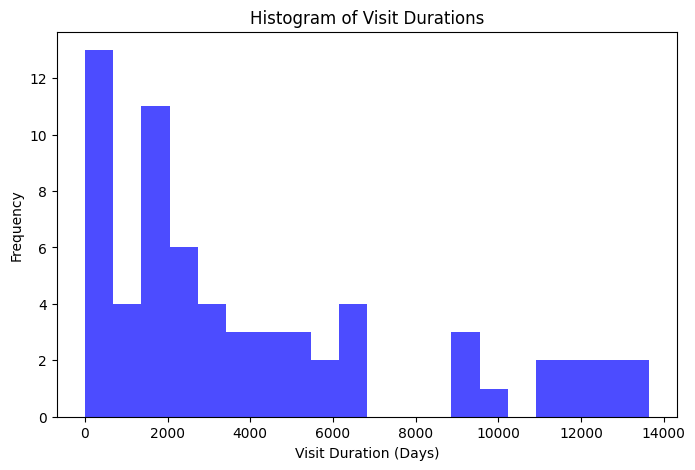

In [10]:


# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['visit_type_concept_id'], y=df['visit_duration'], hue=df['visit_concept_id'])
plt.title("Scatter Plot of Visit Type vs. Duration")
plt.show()



# Histogram
plt.figure(figsize=(8,5))
plt.hist(df['visit_duration'], bins=20, color='blue', alpha=0.7)
plt.xlabel("Visit Duration (Days)")
plt.ylabel("Frequency")
plt.title("Histogram of Visit Durations")
plt.show()

Random Forest: 0.5000
Decision Tree: 0.6000
Naïve Bayes: 0.6000


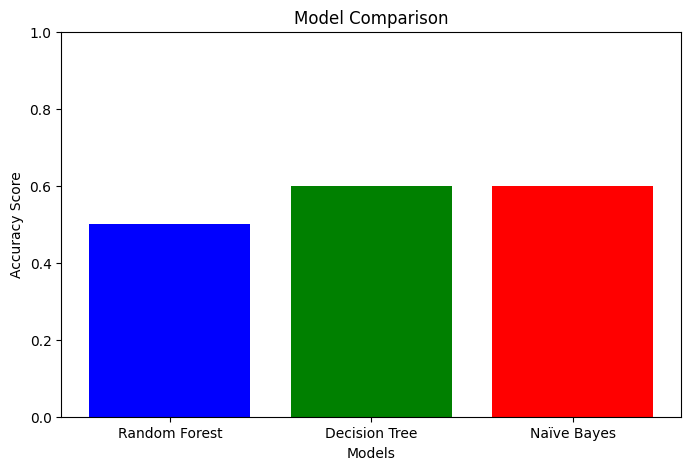

In [11]:
import matplotlib.pyplot as plt

# Store accuracy results
model_results = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Naïve Bayes": accuracy_score(y_test, y_pred_nb)
}

# Print results
for model, accuracy in model_results.items():
    print(f"{model}: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()
